

A partir dos dados sinteticamente gerados, treine dois preditores utilizando o framework do Scikit-Learn: um preditor por Regressão Linear e outro por Regressão Logística. Sinta-se livre para acrescentar colunas ao dataset ou ainda modificar as existentes se julgar necessário.

Pesquise maneiras de avaliar a performance dos modelos de regressão linear e de regressão logísitica.

Elabore um relatório sobre o treinamento dos modelos em um caderno Jupyter e o submeta como conclusão desta atividade.

In [1]:
# Adicionando o pacote geração de dados ao sys.path
import sys
sys.path.append('/home/gustavo/Área de Trabalho/PUC-CDIA/Projeto Integrado/gerador-datasets-estudantes')

# Gerando dados aleatórios
from cdia.datasets import DatasetEstudantes
n_amostra = 10000

#  O método criar retorna um DataFrame (Pandas)
df = DatasetEstudantes.criar(n_amostra)
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,numero,bairro,cidade,uf,cep,motivação
0,RA55000001,Adja Cortesão Negromonte,18,73.0,1,2,3,1,62,Rua Nossa Senhora Aparecida,375,Jardim Francisco Mendes,São Paulo,SP,02366-110,10
1,RA55000002,Renalle Rebimbas Farias Caetano,18,80.0,1,2,3,1,34,Rua Marcos Liberi,843,Conjunto Residencial José Bonifácio,São Paulo,SP,08253-270,10
2,RA55000003,Cecillia Anes,18,35.0,1,2,3,1,90,Praça São Marcos,834,Vila Ida,São Paulo,SP,05455-050,9
3,RA55000004,Nauro Ataíde Norões Quintana,18,230.0,1,1,3,1,88,Praça Monsenhor Macedo,598,Jardim Franca,São Paulo,SP,02338-040,9
4,RA55000005,Luidi Basílio,18,456.0,1,1,3,1,90,Praça da Sé,53,Sé,São Paulo,SP,01001-901,9


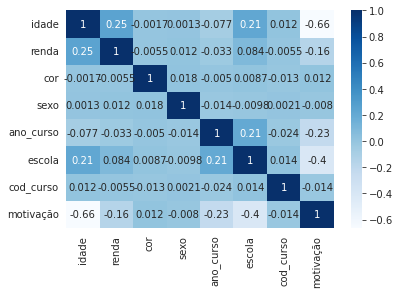

In [2]:
# Vendo a correlação dos dados
import seaborn as sb
sb.heatmap(df.corr(), annot=True, cmap='Blues');

In [3]:
from sklearn.model_selection import train_test_split

# Filtrando dados para o modelo de regressão linear
features = df[['idade', 'cor', 'sexo', 'ano_curso', 'escola', 'cod_curso', 'renda']]
target = df['motivação']

# Separando os dados de treino e teste
features_treino, features_teste, target_treino, target_teste = train_test_split(features, target, test_size=0.33, random_state=42)

## Criando e avaliando o modelo para previão de motivação dos estudantes

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

modelo_linear = LinearRegression()

modelo_linear.fit(features_treino, target_treino)

def avalia_modelo_linear(modelo, features_teste, target_teste, casas_decimais=3):
    predicao = modelo.predict(features_teste)
    mse = metrics.mean_squared_error(target_teste, predicao)
    print('Erro quadrático médio:', round(mse, casas_decimais))
    print('Raiz quadrada do erro médio:', round(np.sqrt(mse), casas_decimais))
    print('Erro médio absoluto:', round(metrics.mean_absolute_error(target_teste, predicao), casas_decimais))
    print('R quadrado:', round(metrics.r2_score(target_teste, predicao), casas_decimais))

avalia_modelo_linear(modelo_linear, features_teste, target_teste)

Erro quadrático médio: 4.287
Raiz quadrada do erro médio: 2.07
Erro médio absoluto: 1.666
R quadrado: 0.567


## Criando e avaliando o modelo para determinar se o aluno estudou em escola pública ou privada

In [5]:
from sklearn.linear_model import LogisticRegression

# Filtrando dados para o modelo de regressão linear
features = df[['idade', 'motivação', 'sexo', 'ano_curso', 'cor', 'cod_curso', 'renda']]
target = df['escola']

# Separando os dados de treino e teste
features_treino, features_teste, target_treino, target_teste = train_test_split(features, target, test_size=0.33, random_state=42)


modelo_logistico = LogisticRegression()
modelo_logistico.fit(features_treino, target_treino)


def avalia_modelo_de_classificacao(modelo, features_teste, target_teste, casas_decimais=3):
    predicao = modelo.predict(features_teste)
    acuracia = metrics.accuracy_score(target_teste, predicao)
    print('Acurácia:', round(acuracia, casas_decimais))
    print('Precisão:', round(metrics.precision_score(target_teste, predicao), casas_decimais))
    print('Recall:', round(metrics.recall_score(target_teste, predicao), casas_decimais))
    print('F1 Score:', round(metrics.f1_score(target_teste, predicao), casas_decimais))

avalia_modelo_de_classificacao(modelo_logistico, features_teste, target_teste)

Acurácia: 0.666
Precisão: 0.644
Recall: 0.738
F1 Score: 0.687
